<a href="https://colab.research.google.com/github/C3Suryansu/Traditional-Dance-Classification/blob/master/Dance_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://github.com/C3Suryansu/Traditional-Dance-Classification/tree/master/dataset

--2020-06-21 11:57:02--  https://github.com/C3Suryansu/Traditional-Dance-Classification/tree/master/dataset
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘dataset’

dataset                 [ <=>                ]  66.33K  --.-KB/s    in 0.03s   

2020-06-21 11:57:02 (2.36 MB/s) - ‘dataset’ saved [67917]



In [4]:
import pandas as pd
train_df = pd.read_csv('Traditional-Dance-Classification/dataset/train.csv')
test_df = pd.read_csv('Traditional-Dance-Classification/dataset/test.csv')

In [5]:
print(train_df.head())
print(test_df.head())

     Image         target
0   96.jpg       manipuri
1  163.jpg  bharatanatyam
2  450.jpg         odissi
3  219.jpg      kathakali
4  455.jpg         odissi
     Image
0  508.jpg
1  246.jpg
2  473.jpg
3  485.jpg
4  128.jpg


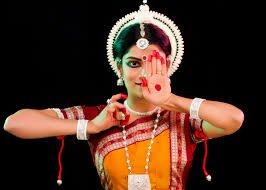

(190, 266, 3)

In [7]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('Traditional-Dance-Classification/dataset/train/' + str(train_df['Image'][4]))
cv2_imshow(img)
img.shape

In [8]:
train_df['target'].value_counts()

mohiniyattam     50
odissi           49
bharatanatyam    47
kathakali        47
kuchipudi        46
sattriya         45
kathak           44
manipuri         36
Name: target, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
train, validate = train_test_split(train_df, test_size = 0.25, random_state = 1)

In [10]:
train['target'].value_counts()

bharatanatyam    40
mohiniyattam     38
odissi           35
kathakali        35
sattriya         32
kathak           31
manipuri         31
kuchipudi        31
Name: target, dtype: int64

In [11]:
validate['target'].value_counts()

kuchipudi        15
odissi           14
sattriya         13
kathak           13
kathakali        12
mohiniyattam     12
bharatanatyam     7
manipuri          5
Name: target, dtype: int64

In [12]:
import tensorflow as tf

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Dense,Flatten
import numpy as np

In [14]:
classifier = Sequential()

classifier.add(Conv2D(32, (3,3), input_shape = (128,128,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.5))

classifier.add(Conv2D(64, (3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.5))

classifier.add(Conv2D(128, (3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.5))

classifier.add(Flatten())
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 8, activation = 'softmax'))

In [16]:
classifier.compile(loss = 'categorical_crossentropy', 
                   optimizer = 'adam', 
                   metrics = ['accuracy'])

In [17]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       7

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
train_image_data = ImageDataGenerator(rescale = 1./255.,
                                      shear_range = 0.2,
                                      zoom_range = 0.2)
val_image_data = ImageDataGenerator(rescale = 1./255.,
                                    shear_range = 0.2,
                                    zoom_range = 0.2)

In [20]:
train_generator = train_image_data.flow_from_dataframe(dataframe = train,
                                                       directory = 'Traditional-Dance-Classification/dataset/train',
                                                       x_col = 'Image',
                                                       y_col = 'target',
                                                       batch_size = 32,
                                                       class_mode = 'categorical',
                                                       target_size = (128,128))

Found 273 validated image filenames belonging to 8 classes.


In [21]:
test_generator = val_image_data.flow_from_dataframe(dataframe = validate,
                                                    directory = 'Traditional-Dance-Classification/dataset/train',
                                                    x_col = 'Image',
                                                    y_col = 'target',
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    target_size = (128,128))

Found 91 validated image filenames belonging to 8 classes.
